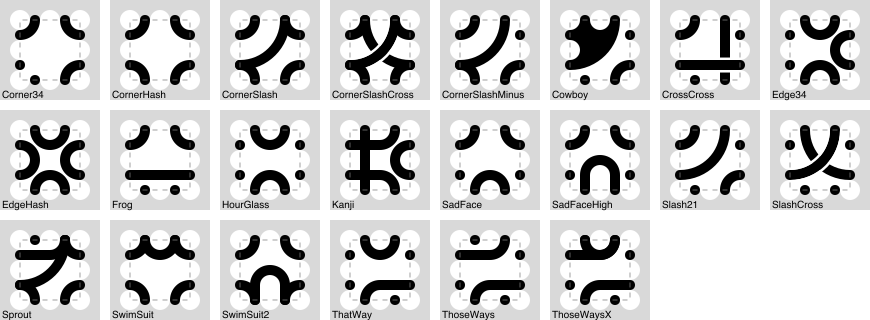

In [1]:
from carlson import carlson, show_tiles
from n6 import *
show_tiles(n6_tiles, with_name=True, only_one=True, size=100)

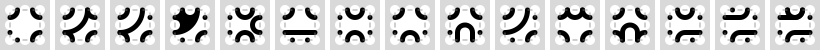

In [2]:
show_tiles(n6_circles, with_name=False, size=50, only_one=True)

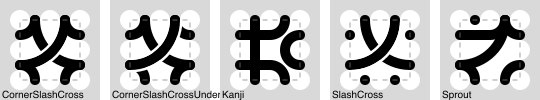

In [3]:
show_tiles(n6_weird, with_name=True, only_one=True)

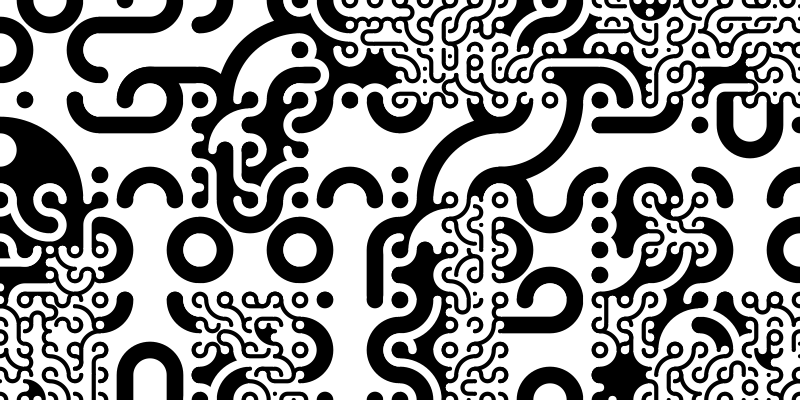

In [4]:
tiles = [*rotations(CornerSlashCross), *rotations(SlashCross), *rotations(Sprout)]
tiles = n6_circles
carlson(width=800, height=400, tilew=100, tiles=tiles, nlayers=3, chance=.5, grid=0, seed=18)

In [5]:
carlson(
    width=2160, height=3840, tilew=240, tiles=n6_circles, nlayers=4, chance=.4, bg="#335495", fg="#243b6a", 
    format="png", output="~/wallpaper/tru6.png",
)